In [1]:
from PIL import Image
import cv2
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Train = pd.read_csv('C:/Users/hashe/Downloads/datasetSmartathon/dataset/train.csv') # Read annotations
Train['class'] += 1 # Start from 1

In [3]:
# Prepare the annotations for training (Form expected by the Dataset class):

TrainData = {}
for sample in np.array(Train):
    if sample[1] not in TrainData:
        TrainData[sample[1]] = {'bbox': [[ int(sample[4]), int(sample[6]), int(sample[3]), int(sample[5]), int(sample[0])]]}
        
    else:
        TrainData[sample[1]]['bbox'].append([ int(sample[4]), int(sample[6]), int(sample[3]), int(sample[5]), int(sample[0])])


In [4]:
"""

1920 X 1080

xmax: 30 to 1384
xmin: -397 to 935

ymax: 20 to 698
ymin: -150 to 500

"""

'\n\n1920 X 1080\n\nxmax: 30 to 1384\nxmin: -397 to 935\n\nymax: 20 to 698\nymin: -150 to 500\n\n'

In [5]:
def visualize_boxes(image, boxes):
    """
    Visualize bounding boxes on an image.
    
    Parameters:
    image: A numpy array representing the image.
    boxes: A list of bounding boxes, where each box is a list of the form [xmin, ymin, xmax, ymax].
    
    Returns:
    An image with the bounding boxes overlaid.
    """
    
    height, width = image.shape[:2]

    
    # Create a copy of the image to draw on
    image_copy = image.copy()

    # Iterate through the list of boxes and draw them on the image
    for box in boxes:

        xmin, ymin, xmax, ymax = box

        cv2.rectangle(image_copy, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)

    return image_copy

def correct_boxes(image, boxes):
    """
    Correct bounding boxes by setting xmin and ymin to 0 if they are negative.
    
    Parameters:
    image: A numpy array representing the image.
    boxes: A list of bounding boxes, where each box is a list of the form [xmin, ymin, xmax, ymax].
    
    Returns:
    A list of corrected bounding boxes.
    """
    image_height, image_width, _ = image.shape
    corrected_boxes = []

    for box in boxes:
        xmin, ymin, xmax, ymax = box[0:-1]

        # Set xmin and ymin to 0 if they are negative
        if xmin < 0:
            xmin = 0
        if ymin < 0:
            ymin = 0

        # Make sure xmax and ymax are not greater than the width and height of the image
        if xmax > image_width:
            xmax = image_width
        if ymax > image_height:
            ymax = image_height

        corrected_boxes.append([xmin, ymin, xmax, ymax])

    return corrected_boxes


def visualize_corrected_boxes(image, boxes):
    corrected_boxes = correct_boxes(image, boxes)
    image_with_boxes = visualize_boxes(image, corrected_boxes)
    return image_with_boxes

In [6]:
Allimages = os.listdir('C:/Users/hashe/Downloads/datasetSmartathon/dataset/images') # Images directory

In [7]:
ImgName = random.sample(Allimages, 1)[0] # The image: e4b6352b046ffc358cc9204f0f6d3826.jpg, is good to show the wrong annotations issue
print(ImgName)
InImg = np.array(Image.open('C:/Users/hashe/Downloads/datasetSmartathon/dataset/images/' + ImgName))
bbox  =  TrainData[ImgName]['bbox']
print('Classes: ', TrainData[ImgName]['bbox'])

31290fbea375cd6f1d6cfdce56afb520.jpg
Classes:  [[573, 258, 699, 375, 4]]


In [8]:
OutImg = visualize_corrected_boxes(InImg, bbox)

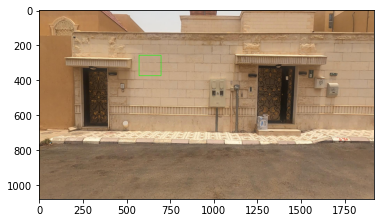

In [9]:
plt.imshow(OutImg)
plt.show()